In [30]:
import pandas as pd
import numpy as np
import json
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

from alasmc.glm import BinomialLogit, PoissonRegression

csfont = {'fontname': 'Computer Modern'}#'Comic Sans MS'}
hfont = {'fontname':'Helvetica'}

In [83]:
with open('results/experiment1_latest_precise.json', 'r') as file:
        experiment1 = json.load(file)
experiment1_df = pd.DataFrame(experiment1)

# Graph 1 (v0)

In [37]:
matplotlib.rcParams['font.family'] = ['serif']

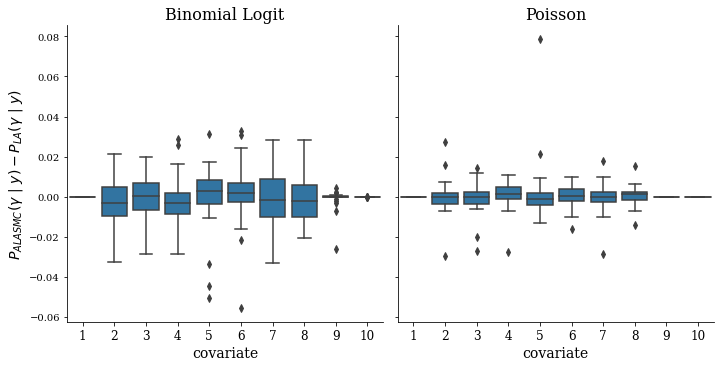

In [86]:
quantities = ['dataset', 'method', 'run', 'n', 'p', 'model', 'marginalPProb']
df_graph_1 = [{key: value for key, value in d.items() if key in quantities} 
              for d in experiment1 if d['method'] != 'ALA']
df_graph_1 = pd.DataFrame(df_graph_1)
df_graph_1[[str(i) for i in range(1, 11)]] = pd.DataFrame(df_graph_1.marginalPProb.tolist(), index= df_graph_1.index)
df_graph_1.drop(columns=['marginalPProb'], inplace = True)
df_graph_1_final = pd.melt(df_graph_1, 
                           id_vars=['model', 'method', 'dataset', 'run'], 
                           value_vars=[str(i) for i in range(1, 11)], 
                           var_name='covariate',
                           value_name='marginalPProb')

df_graph_1_final["covariate"] = pd.to_numeric(df_graph_1_final.covariate)

df_graph_1_final = pd.merge(df_graph_1_final[df_graph_1_final.method == "ALASMC"], 
                            df_graph_1_final.loc[df_graph_1_final.method == "LA", ['dataset', 'model', 'marginalPProb', 'covariate']],
                            how='left', on=['model', 'dataset', 'covariate'], suffixes=['', '_LA'])
df_graph_1_final.dropna(inplace=True)
df_graph_1_final["marginalPProb_diff"] = df_graph_1_final.marginalPProb - df_graph_1_final.marginalPProb_LA
df_graph_1_final.drop(columns=['marginalPProb', 'marginalPProb_LA'], inplace=True)
df_graph_1_final = df_graph_1_final.groupby(by=['model', 'dataset', 'covariate']).agg({"marginalPProb_diff": np.mean}).reset_index()
g = sns.FacetGrid(data=df_graph_1_final, col="model", height=5, sharex=False)
g.map_dataframe(sns.boxplot, x="covariate", y="marginalPProb_diff", whis=1.9)
g.set_ylabels(r"$P_{ALASMC}(\gamma\ |\ y) - P_{LA}(\gamma\ |\ y)$", size=14)
g.set_xlabels(size=14)
g.set_xticklabels(size=12)
g.set_titles(col_template="{col_name}", size=16)
# g.savefig("averaged_logistic_poisson_margpp_diff_ala_la.png")

In [79]:
ylabels.astype(str)

array(['-0.1', '0.0', '0.1', '0.20000000000000004', '0.30000000000000004',
       '0.4', '0.5000000000000001', '0.6000000000000001'], dtype='<U32')

## Graph 1 (v1)

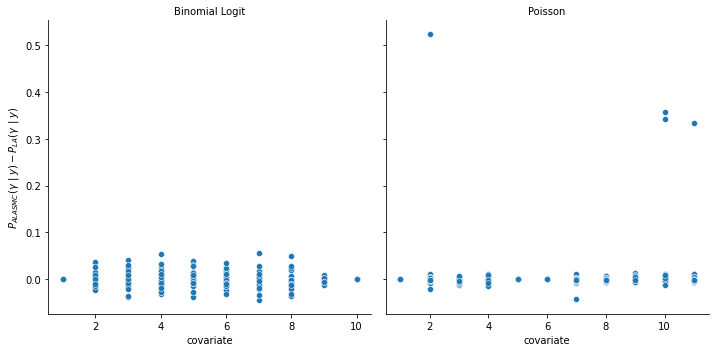

In [35]:
quantities = ['dataset', 'method', 'run', 'n', 'p', 'model', 'marginalPProb', 'converged']
df_graph_1 = [{key: value for key, value in d.items() if key in quantities}
              for d in experiment1 if d['method'] != 'ALA']
df_graph_1 = pd.DataFrame(df_graph_1)
df_graph_1[[str(i) for i in range(1, 12)]] = pd.DataFrame(df_graph_1.marginalPProb.tolist(), index= df_graph_1.index)
df_graph_1.drop(columns=['marginalPProb'], inplace = True)
df_graph_1_final = pd.melt(df_graph_1, 
                           id_vars=['model', 'method', 'dataset', 'run'], 
                           value_vars=[str(i) for i in range(1, 12)], 
                           var_name='covariate',
                           value_name='marginalPProb')

df_graph_1_final["covariate"] = pd.to_numeric(df_graph_1_final.covariate)

df_graph_1_final = pd.merge(df_graph_1_final[df_graph_1_final.method == "ALASMC"], 
                            df_graph_1_final.loc[df_graph_1_final.method == "LA", ['dataset', 'model', 'marginalPProb', 'covariate']],
                            how='left', on=['model', 'dataset', 'covariate'], suffixes=['', '_LA'])
df_graph_1_final.dropna(inplace=True)
df_graph_1_final["marginalPProb_diff"] = df_graph_1_final.marginalPProb - df_graph_1_final.marginalPProb_LA
df_graph_1_final.drop(columns=['marginalPProb', 'marginalPProb_LA'], inplace=True)
g = sns.FacetGrid(data=df_graph_1_final, col="model", height=5, sharex=False)
g.map_dataframe(sns.scatterplot, x="covariate", y="marginalPProb_diff", whis=1.9)
g.set_ylabels(r"$P_{ALASMC}(\gamma\ |\ y) - P_{LA}(\gamma\ |\ y)$")
g.set_titles(col_template="{col_name}")
g.savefig("logistic_poisson_margpp_diff_ala_la.png")

# Graph 1 (v2)

In [25]:
filter_out

[(2, 18.0),
 (11, 6.0),
 (11, 7.0),
 (11, 16.0),
 (11, 19.0),
 (11, 21.0),
 (11, 23.0),
 (11, 24.0),
 (11, 28.0),
 (11, 29.0),
 (11, 30.0),
 (11, 32.0),
 (11, 34.0),
 (11, 37.0),
 (11, 38.0),
 (11, 43.0),
 (11, 44.0),
 (11, 47.0),
 (21, 3.0),
 (21, 21.0),
 (30, 0.0),
 (30, 13.0),
 (30, 30.0),
 (21, 1.0),
 (21, 14.0),
 (21, 36.0),
 (21, 49.0),
 (19, 42.0),
 (21, 0.0),
 (21, 1.0),
 (21, 2.0),
 (21, 3.0),
 (21, 4.0),
 (21, 5.0),
 (21, 6.0),
 (21, 7.0),
 (21, 8.0),
 (21, 9.0),
 (21, 10.0),
 (21, 11.0),
 (21, 12.0),
 (21, 13.0),
 (21, 14.0),
 (21, 15.0),
 (21, 16.0),
 (21, 17.0),
 (21, 18.0),
 (21, 19.0),
 (21, 20.0),
 (21, 21.0),
 (21, 22.0),
 (21, 23.0),
 (21, 24.0),
 (21, 25.0),
 (21, 26.0),
 (21, 27.0),
 (21, 28.0),
 (21, 29.0),
 (21, 30.0),
 (21, 31.0),
 (21, 32.0),
 (21, 33.0),
 (21, 34.0),
 (21, 35.0),
 (21, 36.0),
 (21, 37.0),
 (21, 38.0),
 (21, 39.0),
 (21, 40.0),
 (21, 41.0),
 (21, 42.0),
 (21, 43.0),
 (21, 44.0),
 (21, 45.0),
 (21, 46.0),
 (21, 47.0),
 (21, 48.0),
 (21, 49.0),
 (

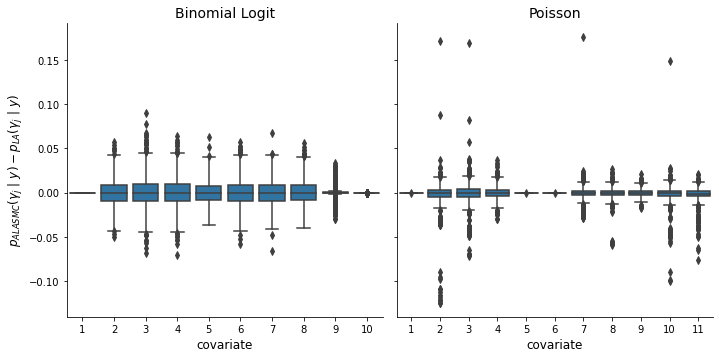

In [13]:
filter_out = list(zip(df_graph_1_final.loc[np.abs(df_graph_1_final["marginalPProb_diff"]) > 0.2].dataset, df_graph_1_final.loc[np.abs(df_graph_1_final["marginalPProb_diff"]) > 0.2].run))
filt = np.array([(dataset, run) in filter_out for dataset, run in list(zip(experiment1_df.dataset, experiment1_df.run))])
experiment1_df = experiment1_df.loc[~filt]
quantities = ['dataset', 'method', 'run', 'n', 'p', 'model', 'marginalPProb']
df_graph_1 = experiment1_df[quantities].copy()
df_graph_1[[str(i) for i in range(1, 12)]] = pd.DataFrame(df_graph_1.marginalPProb.tolist(), index= df_graph_1.index)
df_graph_1.drop(columns=['marginalPProb'], inplace = True)
df_graph_1_final = pd.melt(df_graph_1, 
                           id_vars=['model', 'method', 'dataset', 'run'], 
                           value_vars=[str(i) for i in range(1, 12)], 
                           var_name='covariate',
                           value_name='marginalPProb')

df_graph_1_final["covariate"] = pd.to_numeric(df_graph_1_final.covariate)

df_graph_1_final = pd.merge(df_graph_1_final[df_graph_1_final.method == "ALASMC"], 
                            df_graph_1_final.loc[df_graph_1_final.method == "LA", ['dataset', 'model', 'marginalPProb', 'covariate']],
                            how='left', on=['model', 'dataset', 'covariate'], suffixes=['', '_LA'])
df_graph_1_final.dropna(inplace=True)
df_graph_1_final["marginalPProb_diff"] = df_graph_1_final.marginalPProb - df_graph_1_final.marginalPProb_LA
df_graph_1_final.drop(columns=['marginalPProb', 'marginalPProb_LA'], inplace=True)
g = sns.FacetGrid(data=df_graph_1_final, col="model", height=5, sharex=False)
g.map_dataframe(sns.boxplot, x="covariate", y="marginalPProb_diff", whis=1.9)
g.set_ylabels(r"$p_{ALASMC}(\gamma_j\ |\ y) - p_{LA}(\gamma_j\ |\ y)$", size=12)
g.set_xlabels(size=12)
g.set_titles(col_template="{col_name}", size = 14)
g.savefig("droppathological_logistic_poisson_margpp_diff_ala_la.png", dpi=200)

In [26]:
sum(filt) / len(experiment1)

0.05641025641025641

# Table 1

<span style="color:red">**MISSING**</span>.

In [179]:
ALASMC_exp1_res = experiment1_df[experiment1_df.method.eq("ALASMC")]

In [180]:
ALASMC_exp1_res.columns

Index(['dataset', 'method', 'n', 'p', 'p_true', 'rho', 'beta_true',
       'coef_init', 'model', 'force_intercept', 'marginalPProb', 'postProb',
       'recovers_true', 'time', 'run', 'particle_number', 'adaptive_move',
       'adjusted_curvature', 'kernel_steps', 'burn_in',
       'postProb_chi2dist_to_LA', 'marginalPProb_euqldist_to_LA',
       'recovers_LA'],
      dtype='object')

In [185]:

#ALASMC_exp1_res.rename(columns={'postProb_chi2dist_to_LA'}, inplace=True)
table = ALASMC_exp1_res.groupby(by=['model']).agg({'recovers_LA': np.mean, 
                                           'recovers_true': np.mean, 
                                           'postProb_chi2dist_to_LA': np.mean}).to_latex()
print(table)

\begin{tabular}{lrrr}
\toprule
{} &  recovers\_LA &  recovers\_true &  postProb\_chi2dist\_to\_LA \\
model          &              &                &                          \\
\midrule
Binomial Logit &     0.975333 &       0.853333 &                 0.028868 \\
Poisson        &     1.000000 &       1.000000 &                 0.921182 \\
\bottomrule
\end{tabular}



C:\Users\Максим\AppData\Local\Temp\ipykernel_9076\251492135.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  table = ALASMC_exp1_res.groupby(by=['model']).agg({'recovers_LA': np.mean,


# Graph 2

In [71]:
p_list = [10, 20, 30, 50]
coefs_to_try = ["zero", "MLE"]
n_list = [500, 1000, 2500, 5000]
glm_list = ['Binomial Logit', 'Poisson']
param_grid_p_flex = [(1000, int(p), coef_str, glm) for p, coef_str, glm in
                     np.array(np.meshgrid(p_list, coefs_to_try, glm_list)).T.reshape(-1, 3)]
param_grid_n_flex = [(int(n), 10, coef_str, glm) for n, coef_str, glm in
                     np.array(np.meshgrid(n_list, coefs_to_try, glm_list)).T.reshape(-1, 3)]

In [72]:
with open('results/experiment2.json', 'r') as file:
        experiment2 = json.load(file)
p_part = [(d.get('n'), d.get('p'), d.get('coef_init'), d.get('model')) in param_grid_p_flex for d in experiment2]
n_part = [(d.get('n'), d.get('p'), d.get('coef_init'), d.get('model')) in param_grid_n_flex for d in experiment2]

In [73]:
experiment2_df = pd.DataFrame(experiment2)
experiment2_df["p_flex"] = p_part
experiment2_df["n_flex"] = n_part
duplicate = (experiment2_df.p_flex * experiment2_df.n_flex)
duplicated_records = experiment2_df[duplicate].copy()
duplicated_records.loc[duplicate, 'p_flex'] = False 
experiment2_df.loc[duplicate, 'n_flex'] = False 
experiment2_df = pd.concat([experiment2_df, duplicated_records], ignore_index=True)

In [83]:
experiment2_graph = experiment2_df.groupby(by=['n', 'p', 'coef_init', 'model', 'n_flex']).agg({"iterations": np.mean}).reset_index()

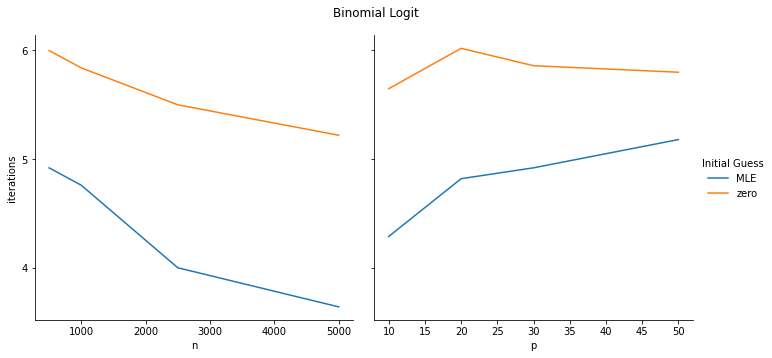

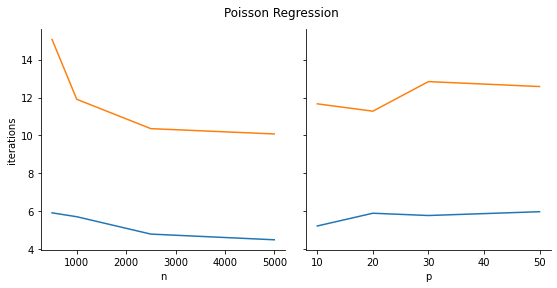

In [175]:
x_vars = ["n", "p"]
y_vars = ["iterations"]

g1 = sns.PairGrid(experiment2_graph[experiment2_graph.model == 'Binomial Logit'], hue="coef_init", 
                  x_vars=x_vars, y_vars=y_vars, height=5)
g1.map_offdiag(sns.lineplot, ci=None)

g1.figure.subplots_adjust(top=0.9)
g1.figure.suptitle('Binomial Logit')

g2 = sns.PairGrid(experiment2_graph[experiment2_graph.model == 'Poisson'], hue="coef_init", x_vars=x_vars, y_vars=y_vars,
                height=4)
g2.map_offdiag(sns.lineplot, ci=None)

g2.figure.subplots_adjust(top=0.9)
g2.figure.suptitle('Poisson Regression')

from matplotlib.ticker import MaxNLocator

for ax in g1.axes.flat:
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# g1.add_legend(title='Initial Guess')

graphs = [g1, g2]

# Table 2

In [187]:
with open('results/experiment2.json', 'r') as file:
        experiment2 = json.load(file)
p_part = [(d.get('n'), d.get('p'), d.get('coef_init'), d.get('model')) in param_grid_p_flex for d in experiment2]
df_p_flex = pd.DataFrame(experiment2)[p_part]

In [189]:
df_p_flex.columns

Index(['dataset', 'method', 'n', 'p', 'p_true', 'rho', 'coef_init',
       'iterations', 'included_true', 'discarded_spurious', 'model',
       'particle_number', 'force_intercept', 'adaptive_move',
       'adjusted_curvature', 'kernel_steps', 'burn_in',
       'mean_marginalPProb_active', 'mean_marginalPProb_spurious',
       'recovers_true', 'time'],
      dtype='object')

In [196]:
table2 = df_p_flex.groupby(by=['model', 'coef_init', 'p']).agg({"recovers_true": np.mean,
                                                           "included_true": np.mean,
                                                           "discarded_spurious": np.mean,
                                                           "time": np.mean}).to_latex()
print(table2)

\begin{tabular}{lllrrrr}
\toprule
        &      &    &  recovers\_true &  included\_true &  discarded\_spurious &       time \\
model & coef\_init & p &                &                &                     &            \\
\midrule
Binomial Logit & MLE & 10 &           0.90 &           2.98 &                6.92 &   4.111997 \\
        &      & 20 &           0.94 &           2.94 &               16.96 &   9.280608 \\
        &      & 30 &           0.76 &           3.00 &               26.70 &  13.834386 \\
        &      & 50 &           0.86 &           2.96 &               46.84 &  20.871651 \\
        & zero & 10 &           0.86 &           2.96 &                6.90 &   5.032499 \\
        &      & 20 &           0.96 &           3.00 &               16.96 &  10.854354 \\
        &      & 30 &           0.86 &           2.92 &               26.90 &  14.065402 \\
        &      & 50 &           0.92 &           2.92 &               46.96 &  20.338796 \\
Poisson & MLE & 10 &     

C:\Users\Максим\AppData\Local\Temp\ipykernel_9076\615680908.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  table2 = df_p_flex.groupby(by=['model', 'coef_init', 'p']).agg({"recovers_true": np.mean,


# Table 3

In [220]:
with open('results/experiment3_new.json', 'r') as file:
        experiment3 = json.load(file)
experiment3_df = pd.DataFrame(experiment3)

with open('results/experiment3_12_14_new.json', 'r') as file:
        experiment3_add = json.load(file)
experiment3_add_df = pd.DataFrame(experiment3_add)

In [224]:
experiment3_df

,dataset,method,n,p,p_true,rho,beta_true,coef_init,model,force_intercept,...,time,run,particle_number,adaptive_move,adjusted_curvature,kernel_steps,burn_in,postProb_chi2dist_to_LA,marginalPProb_euqldist_to_LA,recovers_LA
0,1,LA,1000,10,3,0.5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5, ...","[-0.07941616189312643, -0.0005243532671261621,...",Binomial Logit,False,...,1.399859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,ALASMC,1000,10,3,0.5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5, ...","[-0.07941616189312643, -0.0005243532671261621,...",Binomial Logit,False,...,1.392049,0.0,1000.0,False,True,1.0,2500.0,0.050356,0.100589,True
2,1,LA,1000,10,3,0.5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5, ...","[-0.03494207730508423, -0.00816668064823567, 0...",Poisson,False,...,3.776657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,ALASMC,1000,10,3,0.5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5, ...","[-0.03494207730508423, -0.00816668064823567, 0...",Poisson,False,...,1.273080,0.0,1000.0,False,True,1.0,2500.0,0.014931,0.024259,True
4,1,LA,1000,12,3,0.5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.051982177843711945, -0.03967836253028899, 0...",Binomial Logit,False,...,5.548347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,48,ALASMC,1000,14,3,0.5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.01895993306444638, -0.027803478972420085, -...",Poisson,True,...,6.355711,0.0,5000.0,False,True,1.0,5000.0,0.897122,0.020616,True
408,49,LA,1000,14,3,0.5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.037786538677486985, -0.007951012930974343,...",Poisson,True,...,42.012024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
409,49,ALASMC,1000,14,3,0.5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.037786538677486985, -0.007951012930974343,...",Poisson,True,...,6.749116,0.0,5000.0,False,True,1.0,5000.0,0.786859,0.036910,True
410,50,LA,1000,14,3,0.5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.0456206591128194, 0.03690802598727226, -0....",Poisson,True,...,34.293112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [221]:
experiment3_df = pd.concat([experiment3_df, experiment3_add_df], ignore_index=True)

In [230]:
table3 = experiment3_df.groupby(by=['model', 'p', 'method']).agg({'time': np.mean, 'recovers_LA': np.mean, 
                                                         'marginalPProb_euqldist_to_LA': np.mean,
                                                         'postProb_chi2dist_to_LA': np.mean}).to_latex(float_format="%.3f")
print(table3)

\begin{tabular}{lllrrrr}
\toprule
        &    &    &   time &  recovers\_LA &  marginalPProb\_euqldist\_to\_LA &  postProb\_chi2dist\_to\_LA \\
model & p & method &        &              &                               &                          \\
\midrule
Binomial Logit & 10 & ALASMC &  1.392 &        1.000 &                         0.101 &                    0.050 \\
        &    & LA &  1.400 &          NaN &                           NaN &                      NaN \\
        & 12 & ALASMC &  4.565 &        1.000 &                         0.054 &                    0.036 \\
        &    & LA &  7.867 &          NaN &                           NaN &                      NaN \\
        & 14 & ALASMC &  7.677 &        1.000 &                         0.048 &                    0.041 \\
        &    & LA & 32.764 &          NaN &                           NaN &                      NaN \\
Poisson & 10 & ALASMC &  1.273 &        1.000 &                         0.024 &                   

C:\Users\Максим\AppData\Local\Temp\ipykernel_9076\1423353808.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  table3 = experiment3_df.groupby(by=['model', 'p', 'method']).agg({'time': np.mean, 'recovers_LA': np.mean,
